In [ ]:
import numpy as np
import pandas as pd
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud




In [ ]:
data_load = pd.read_csv('/content/tmdb_5000_movies.csv')
data_load.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
data_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
data_load.isnull().sum()

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


In [ ]:
data_load.dropna(inplace=True)

In [ ]:
data_load.isnull().sum()

,0
budget,0
genres,0
homepage,0
id,0
keywords,0
original_language,0
original_title,0
overview,0
popularity,0
production_companies,0


In [ ]:
credit_data = pd.read_csv("/content/tmdb_5000_credits.csv")

In [ ]:
credit_data.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [ ]:
credit_data.isnull().sum()

,0
movie_id,0
title,0
cast,0
crew,0


In [ ]:
#merge credit dataset and movie dataset
movies = data_load.merge(credit_data,on="title")

In [ ]:
#select relevent columns from the dataset
movies = movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew',
                 'vote_average', 'vote_count', 'release_date']]


In [ ]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew,vote_average,vote_count,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2,11800,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9,4500,2007-05-19


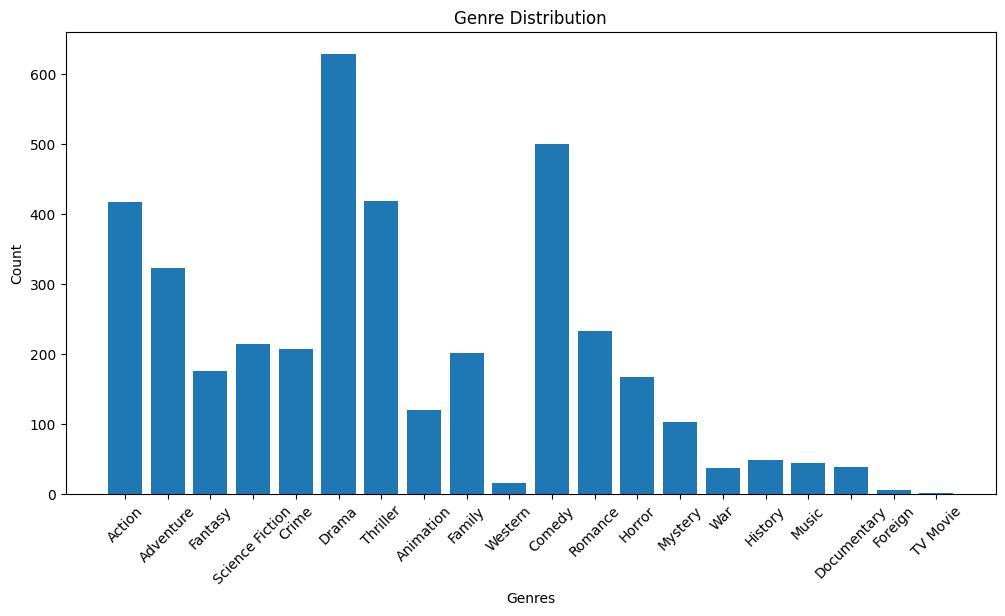

In [ ]:
# Helper function to extract list of names from JSON-like strings
def convert(text):
    try:
        return [i['name'] for i in ast.literal_eval(text)]
    except:
        return []

movies['genres'] = movies['genres'].apply(convert)

# Flatten the list of genres and count their occurrences
all_genres = [genre for sublist in movies['genres'] for genre in sublist]
genre_counts = Counter(all_genres)

# Plot genre distribution
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values())
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

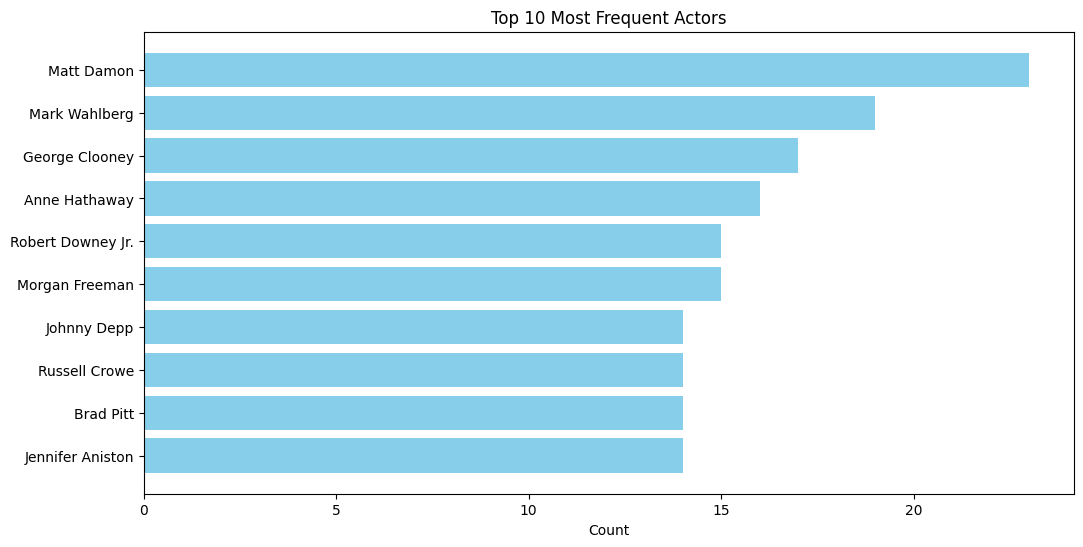

In [ ]:

# Extract top 3 cast members
def get_top_cast(text):
    try:
        return [i['name'] for i in ast.literal_eval(text)[:3]]
    except:
        return []

movies['cast'] = movies['cast'].apply(get_top_cast)

# Flatten the list of actors and count their occurrences
all_actors = [actor for sublist in movies['cast'] for actor in sublist]
actor_counts = Counter(all_actors).most_common(10)

# Plot the top 10 most frequent actors
actors, counts = zip(*actor_counts)
plt.figure(figsize=(12, 6))
plt.barh(actors, counts, color='skyblue')
plt.title("Top 10 Most Frequent Actors")
plt.xlabel("Count")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

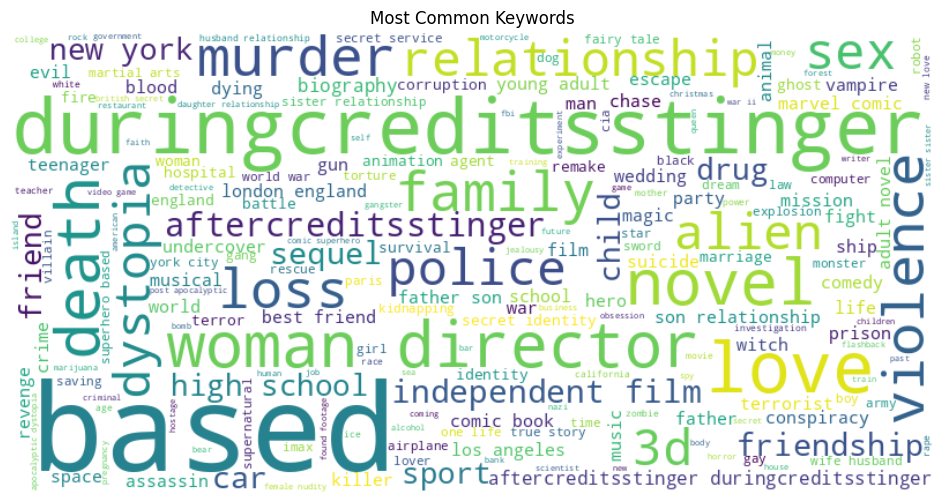

In [ ]:
# Extract keywords
movies['keywords'] = movies['keywords'].apply(convert)
all_keywords = [keyword for sublist in movies['keywords'] for keyword in sublist]

# Generate a WordCloud for keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_keywords))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Keywords")
plt.show()


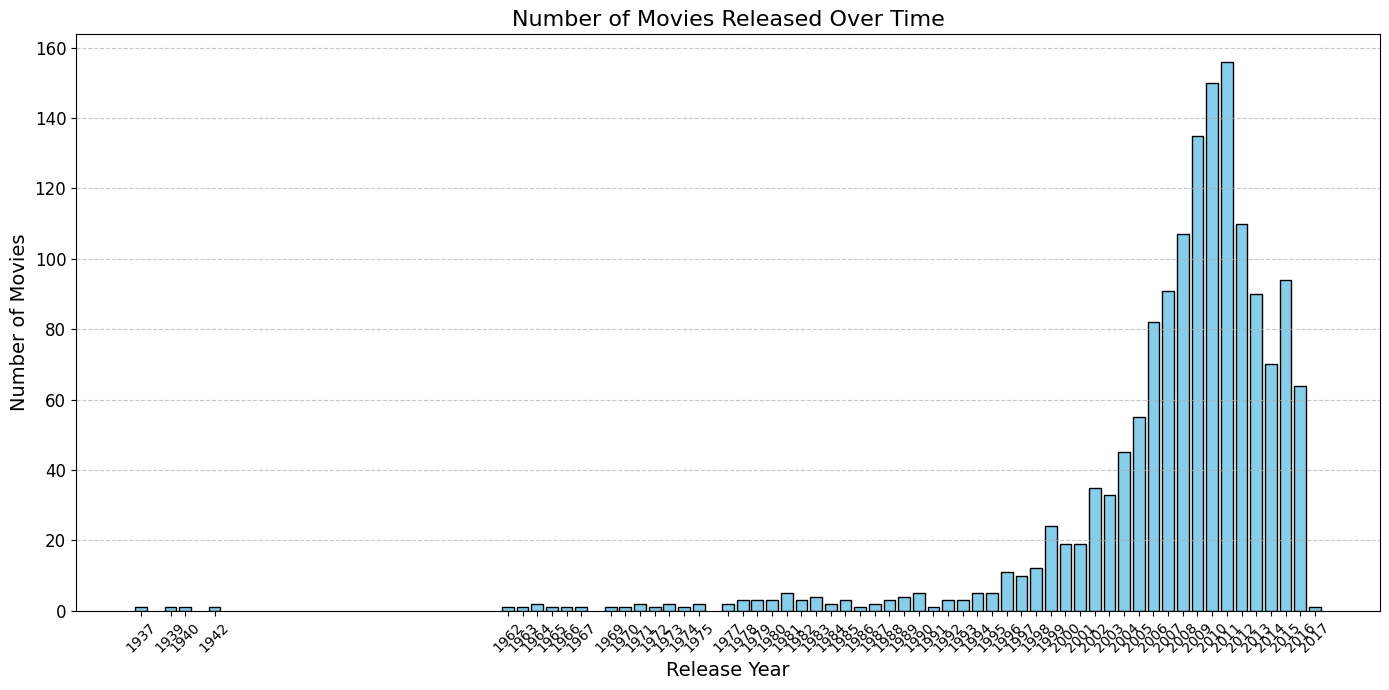

In [ ]:
# Ensure the release_date column is in datetime format

movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y-%m-%d', errors='coerce')

# Extract year, month, and day into separate columns
movies['released_year'] = movies['release_date'].dt.year
movies['released_month'] = movies['release_date'].dt.month
movies['released_day'] = movies['release_date'].dt.day


# Count the number of movies released per year
release_year_counts = movies['released_year'].value_counts().sort_index()

# Plot the release year distribution

plt.figure(figsize=(14, 7))
plt.bar(release_year_counts.index, release_year_counts.values, color='skyblue', edgecolor='black')
plt.title("Number of Movies Released Over Time", fontsize=16)
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(release_year_counts.index, fontsize=10, rotation=45)  # Display all years on the x-axis
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Remove spaces from list items for consistency
def collapse_list(L):
    return [item.replace(" ", "") for item in L]

In [ ]:
# Apply transformations
movies['genres'] = movies['genres'].apply(convert).apply(collapse_list)
movies['keywords'] = movies['keywords'].apply(convert).apply(collapse_list)
movies['cast'] = movies['cast'].apply(get_top_cast).apply(collapse_list)
movies['crew'] = movies['crew'].apply(get_director).apply(collapse_list)
movies['overview'] = movies['overview'].apply(lambda x: x.split() if isinstance(x, str) else [])


In [ ]:
# Create tags by combining relevant fields
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
movies['tags'] = movies['tags'].apply(lambda x: " ".join(x))

# Final dataframe for recommendation system
movies = movies[['movie_id', 'title', 'tags']]


In [ ]:
# Text vectorization using CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(movies['tags']).toarray()

# Compute cosine similarity
similarity = cosine_similarity(vector)


In [ ]:
# Enhanced search function
def find_movies_by_partial_name(keyword):
    keyword = keyword.strip().lower()  # Normalize keyword
    matching_movies = movies[movies['title'].str.lower().str.contains(keyword)]
    if matching_movies.empty:
        print(f"No movies found containing '{keyword}'.")
        return []
    print(f"\nMovies matching '{keyword}':")
    for idx, title in enumerate(matching_movies['title'], 1):
        print(f"{idx}. {title}")
    return matching_movies['title'].tolist()

In [ ]:
# Updated recommendation function with partial name support
def recommend(movie):
    movie = movie.strip().lower()  # Normalize input
    matching_titles = find_movies_by_partial_name(movie)
    if not matching_titles:
        return  # Exit if no matches found
    try:
        selected_index = int(input("\nSelect a movie by entering its number (or type 0 to cancel): "))
        if selected_index == 0:
            print("Selection canceled.")
            return
        selected_movie = matching_titles[selected_index - 1]  # Adjust for zero-based indexing
    except (ValueError, IndexError):
        print("Invalid selection. Please try again.")
        return

    # Generate recommendations for the selected movie
    print(f"\nGenerating recommendations for '{selected_movie}':")
    index = movies[movies['title'] == selected_movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    for i in distances[1:6]:  # Top 5 recommendations
        print(f"- {movies.iloc[i[0]].title}")



In [ ]:
# Save the model and data for future use
pickle.dump(movies, open('movie_list.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))




In [ ]:

# Interactive loop for user input
while True:
    user_movie = input("\nEnter part of a movie title to search (or type 'exit' to quit): ")
    if user_movie.lower() == 'exit':
        print("Thank you for using the movie recommendation system. Goodbye!")
        break
    recommend(user_movie)
    another = input("\nWould you like to search for another movie? (yes/no): ")
    if another.lower() != 'yes':
        print("Thank you for using the movie recommendation system. Goodbye!")
        break



Enter part of a movie title to search (or type 'exit' to quit): knight

Movies matching 'knight':
- The Dark Knight Rises
- The Dark Knight
- Knight and Day

Select a movie by entering its number (or type 0 to cancel): 2

Generating recommendations for 'The Dark Knight':
- The Dark Knight Rises
- Batman Begins
- Batman v Superman: Dawn of Justice
- Despicable Me 2
- Sherlock Holmes: A Game of Shadows

Would you like to search for another movie? (yes/no): no
Thank you for using the movie recommendation system. Goodbye!
